# **Elections Ad Spending Analysis**

### **Content**

1.   Introduction
2.   Importing Libraries
3.   Data Exploration
      *   Detailed Information of the Dataset
4.   Statistical Analysis
      *    Statistical Descriptions of Data
      *    Graphical Display(Quantile-Quantile plot)
5.   Data Visualization
      *    Total ad spend by state(Bar graph)
      *    Average voter turnout by state (Icon-based)
      *    Top 5 parties by ad spend(Pie chart)
      *    Correlation between ad spend and voter turnout(heatmap)
      *    Relationship between ad spend and voter turnout by parliamentary constituency(Scatter plot)
      *    Distribution of ad spending(histogram)
      *    Ad spending and voter turnout by election phase

## **1. Introduction**

During the 2024 Indian elections, political parties like BJP and INC heavily invested in Facebook and Instagram ads. This project analyzes Meta ad spending by state using Python and explores its impact on voting patterns.

## **2. Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## **3. Data Exploration**

In this section, the dataset will be imported and its features will be explained one by one.

In [2]:
#importing all datasets
results = pd.read_csv('/content/results.csv')
advertisers = pd.read_csv('/content/advertisers.csv')
locations = pd.read_csv('/content/locations.csv')

**Dataset results**

In [3]:
results.shape  #dimensions

(550, 8)

In [4]:
results.size  #total number of entries

4400

In [5]:
results.dtypes

,0
_id,int64
Sl No,float64
State,object
PC_Name,object
Total Electors,int64
Polled (%),float64
Total Votes,int64
Phase,float64


In [6]:
results.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase
0,1,1.0,Andaman and Nicobar Islands,Andaman and Nicobar Islands,315148,64.10,202018,1.0
1,2,2.0,Arunachal Pradesh,Arunachal East,375310,83.31,312658,1.0
2,3,3.0,Arunachal Pradesh,Arunachal West,517384,73.60,380783,1.0
3,4,4.0,Assam,Dibrugarh,1659588,76.75,1273744,1.0
4,5,5.0,Assam,Jorhat,1727121,79.89,1379749,1.0


**Dataset advertisers**

In [7]:
advertisers.shape

(20832, 5)

In [8]:
advertisers.size

104160

In [9]:
advertisers.dtypes

,0
Page ID,int64
Page name,object
Disclaimer,object
Amount spent (INR),object
Number of ads in Library,int64


In [10]:
advertisers.head()

,Page ID,Page name,Disclaimer,Amount spent (INR),Number of ads in Library
0,121439954563203,Bharatiya Janata Party (BJP),Bharatiya Janata Party (BJP),193854342,43455
1,351616078284404,Indian National Congress,Indian National Congress,108787100,846
2,132715103269897,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,73361399,1799
3,192856493908290,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,32294327,680
4,109470364774303,Ellorum Nammudan,Populus Empowerment Network Private Limited,22399499,879


**Dataset locations**

In [11]:
locations.shape

(36, 2)

In [12]:
locations.size

72

In [13]:
locations.dtypes

,0
Location name,object
Amount spent (INR),int64


In [14]:
locations.head()

,Location name,Amount spent (INR)
0,Andaman and Nicobar Islands,377858
1,Andhra Pradesh,100819732
2,Arunachal Pradesh,1385654
3,Assam,17478091
4,Bihar,53619242


**The results dataset has a "state" column, and the location dataset has a "location name" column. We will now merge them using these columns.**

In [15]:
results['State'] = results['State'].str.strip().str.lower()                      #str.strip():Removes extra spaces
locations['Location name'] = locations['Location name'].str.strip().str.lower()  #str.lower():Converts to lowercase
merged_data = results.merge(locations,left_on='State',right_on='Location name',
                            how='left')                 #left join,ensures all rows from results are kept even if no match is found in locations
merged_data.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase,Location name,Amount spent (INR)
0,1,1.0,andaman and nicobar islands,Andaman and Nicobar Islands,315148,64.10,202018,1.0,andaman and nicobar islands,377858.0
1,2,2.0,arunachal pradesh,Arunachal East,375310,83.31,312658,1.0,arunachal pradesh,1385654.0
2,3,3.0,arunachal pradesh,Arunachal West,517384,73.60,380783,1.0,arunachal pradesh,1385654.0
3,4,4.0,assam,Dibrugarh,1659588,76.75,1273744,1.0,assam,17478091.0
4,5,5.0,assam,Jorhat,1727121,79.89,1379749,1.0,assam,17478091.0


In [16]:
merged_data.dtypes

,0
_id,int64
Sl No,float64
State,object
PC_Name,object
Total Electors,int64
Polled (%),float64
Total Votes,int64
Phase,float64
Location name,object
Amount spent (INR),float64


In [17]:
# rows where 'Location name' is NaN but 'State' is not NaN
nan_rows = merged_data[merged_data['Location name'].isna() & merged_data['State'].notna()]
print(nan_rows[['State', 'Location name']])

                                         State Location name
208  dadra and nagar haveli and\ndaman and diu           NaN
209  dadra and nagar haveli and\ndaman and diu           NaN
392                                     ladakh           NaN
456                               nct of delhi           NaN
457                               nct of delhi           NaN
458                               nct of delhi           NaN
459                               nct of delhi           NaN
460                               nct of delhi           NaN
461                               nct of delhi           NaN
462                               nct of delhi           NaN
514                                     punjab           NaN
515                                     punjab           NaN
516                                     punjab           NaN
517                                     punjab           NaN
518                                     punjab           NaN
519                     

## **4.  Statistical Analysis**

In [18]:
advertisers.describe()

,Page ID,Number of ads in Library
count,2.083200e+04,20832.000000
mean,8.475103e+14,22.981615
std,7.819863e+15,311.870685
min,6.115848e+09,1.000000
25%,1.081315e+14,1.000000
50%,1.856652e+14,2.000000
75%,3.075540e+14,9.000000
max,1.221339e+17,43455.000000


**Observations**

*   Most pages post a small number of ads, as shown by 50th and 25th percentile
*   high standard deviation highlight the diversity in ad activity across different pages.



In [19]:
merged_data.describe()

,_id,Sl No,Total Electors,Polled (%),Total Votes,Phase,Amount spent (INR)
count,550.000000,543.000000,5.500000e+02,550.000000,5.500000e+02,492.000000,5.200000e+02
mean,275.500000,41.961326,3.549276e+06,66.536509,2.335049e+06,3.160569,6.480140e+07
std,158.915596,26.353550,1.593337e+07,9.824336,1.055306e+07,1.637341,3.820029e+07
min,1.000000,1.000000,5.778400e+04,38.490000,4.863000e+04,1.000000,1.984700e+04
25%,138.250000,20.000000,1.634814e+06,58.537500,1.055907e+06,2.000000,4.042540e+07
50%,275.500000,39.000000,1.823793e+06,65.455000,1.176107e+06,3.000000,5.449617e+07
75%,412.750000,61.000000,1.992416e+06,74.592500,1.352293e+06,4.000000,8.966813e+07
max,550.000000,102.000000,1.770756e+08,92.080000,1.224693e+08,6.000000,1.802523e+08


**Observations**


*   The average spending is ₹64.8 million and the highest spending is ₹180.2 million
*   The average total votes per state is 2.33 million with a maximum of 122 million votes in one state
*   The average voter turnout percentage is about 66.5% with the highest turnout at 92.08%
*   The minimum is 57,784 and the maximum is 177 million, showing a wide range in elector numbers across states







### **Graphical Display(Quantile-Quantile plot)**

Compare the distribution of a dataset with a theoretical distribution (normal)



*   **Q-Q Plot of Amount Spent in merged_data Dataset**



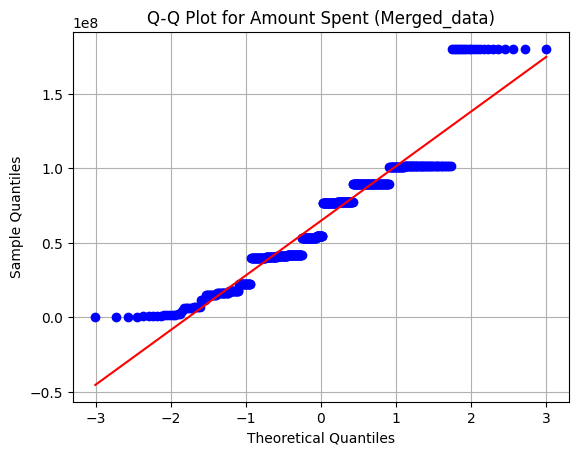

In [30]:
merged_data.dropna(subset=['Amount spent (INR)'],inplace=True)
stats.probplot(merged_data['Amount spent (INR)'],dist="norm",plot=plt)
plt.title('Q-Q Plot for Amount Spent (Merged_data)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

**Observations**

*   Compares the Amount Spent from the Merged_data dataset to a theoretical normal distribution. x-axis represents the theoretical quantiles of a normal distribution. y-axis represents the quantiles from the dataset
*   The red diagonal line represents the expected distribution under normality.The blue dots represent the actual data distribution.
*   If the data follows a normal distribution, the blue points should lie approximately along the red diagonal line.In this plot, the points deviate significantly from the red line, particularly at the upper end (right side), indicating that the data is not normally distributed.
*   The points in the middle range follow the red line relatively well, suggesting that the central values might be somewhat normally distributed.
*   Towards the higher values (right tail), the points are far above the red line suggests a right-skewed distribution
*   This indicates that a few individuals have spent significantly more than the majority, leading to a non-normal distribution.











*   **Q-Q Plot of Amount Spent in advertisers Dataset**


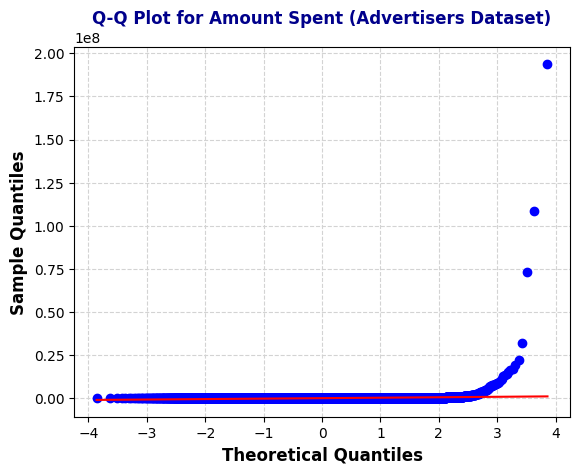

In [21]:
advertisers['Amount spent (INR)'] = pd.to_numeric(advertisers['Amount spent (INR)']
                                    ,errors='coerce')
advertisers.dropna(subset=['Amount spent (INR)'], inplace=True)
stats.probplot(advertisers['Amount spent (INR)'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Amount Spent (Advertisers Dataset)', fontweight='bold',
          color='darkblue')
plt.xlabel('Theoretical Quantiles', fontsize=12, fontweight='bold')
plt.ylabel('Sample Quantiles', fontsize=12, fontweight='bold')
plt.grid(color='lightgrey', linestyle='--')
plt.show()

**Observations**

*   Compares the Amount Spent from the Advertisers dataset to a theoretical normal distribution. x-axis represents the theoretical quantiles of a normal distribution. y-axis represents the quantiles from the dataset
*   The red diagonal line represents the expected distribution under normality.The blue dots represent the actual data distribution.
*   If the points closely follow the red diagonal line, it means data is normally distributed. Deviations from the line indicate differences between the data's distribution and a normal distribution
*   The majority of points lie almost flat along the x-axis, meaning most data points are close to zero.A few extreme points on the right (upper tail) deviate significantly from the red line, indicating right-skewed distribution.








## **5. Data Visualization**

### **Total ad spend by state**

In [22]:
import plotly.express as px
state_ad_spend = merged_data.groupby('State')['Amount spent (INR)'].sum().reset_index()
fig = px.bar(state_ad_spend, x='State', y='Amount spent (INR)',labels={'State': 'State', 'Amount spent (INR)': 'Ad Spend (INR)'},
      title='Total Ad Spend by State')
fig.update_layout(xaxis={'categoryorder': 'total descending'},xaxis_tickangle=-90)
fig.show()

**Observation:** The bar graph shows the total ad spend (in INR) by state. Uttar Pradesh leads significantly with the highest ad spend, followed by Maharashtra and Odisha. States like West Bengal, Tamil Nadu, Andhra Pradesh, and Bihar also show substantial ad expenditures. In contrast, states such as Lakshadweep, Dadra & Nagar Haveli, Daman & Diu, ladakh have the lowest ad spend. It indicates that larger and more populous states tend to spend more on ads, likely reflecting their greater political significance and larger voter base.

### **Average voter turnout by state**

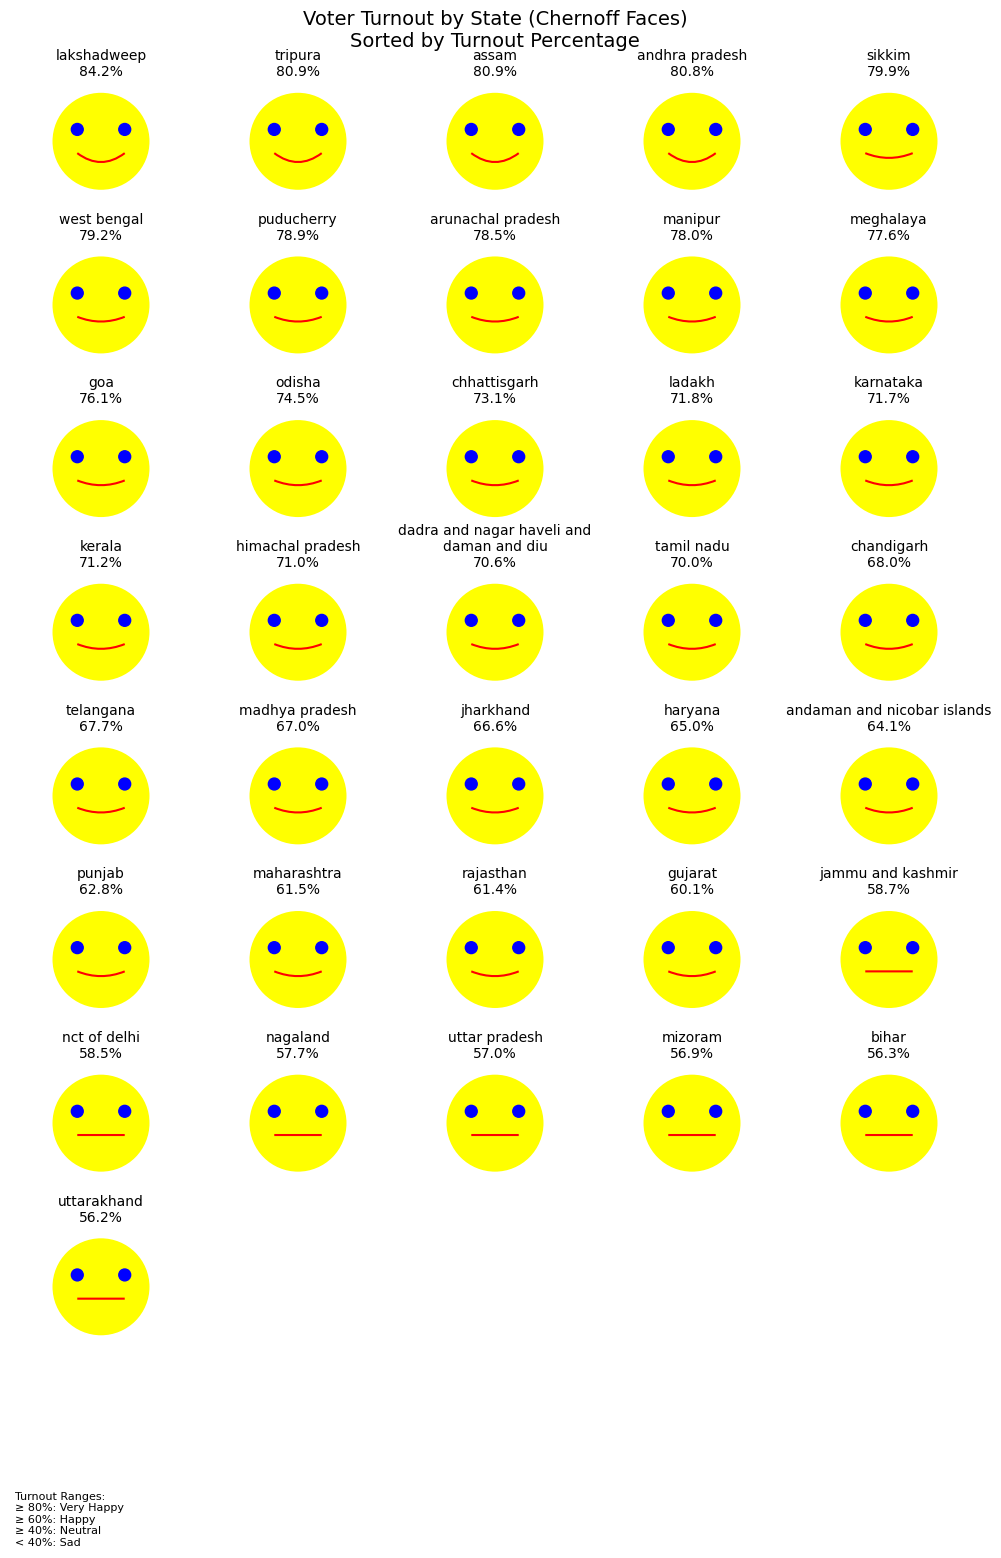

In [23]:
from matplotlib.patches import Circle, PathPatch
from matplotlib.path import Path
import math

def get_face_parameters(turnout):    # Func for face parameters based on turnout
    if turnout >= 80:
        return 0.15  # Big smile (U-shaped, downward)
    elif turnout >= 60:
        return 0.08  # Moderate smile (downward)
    elif turnout >= 40:
        return 0.0   # Neutral (straight line)
    else:
        return -0.10  # Sad (frown, upward)

def draw_chernoff_face(ax, turnout, x=0, y=0):    # Func to draw Chernoff faces
    smile_control = get_face_parameters(turnout)

    face = Circle((x, y), 0.4, fill=True, color='yellow', linewidth=1.5)
    ax.add_patch(face)

    eye_size = 0.05
    left_eye = Circle((x-0.20, y+0.10), eye_size, color='blue')
    right_eye = Circle((x+0.20, y+0.10), eye_size, color='blue')
    ax.add_patch(left_eye)
    ax.add_patch(right_eye)

    verts = [(x-0.2, y-0.10),                   # Left point
        (x, y-0.10 - smile_control),  # Control point for downward smile
        (x+0.2, y-0.10)]                 # Right point
    codes = [Path.MOVETO, Path.CURVE3, Path.CURVE3]
    path = Path(verts, codes)
    mouth = PathPatch(path, fill=False, color='red', linewidth=1.5)
    ax.add_patch(mouth)

df = merged_data.groupby('State')['Polled (%)'].mean().reset_index()
df = df.sort_values('Polled (%)', ascending=False)

n_states = len(df)
n_cols = min(5, n_states)  # Max 5 columns
n_rows = math.ceil(n_states / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))
fig.suptitle('Voter Turnout by State (Chernoff Faces)\nSorted by Turnout Percentage', fontsize=14)

# legend showing the turnout ranges
legend_text = (
    'Turnout Ranges:\n'
    '≥ 80%: Very Happy\n'
    '≥ 60%: Happy\n'
    '≥ 40%: Neutral\n'
    '< 40%: Sad'
)
plt.figtext(0.02, 0.02, legend_text, fontsize=8, ha='left')

if n_rows == 1:
    axs = [axs]
if n_cols == 1:
    axs = [[ax] for ax in axs]

# Draw faces for each state
for idx, (state, turnout) in enumerate(zip(df['State'], df['Polled (%)'])):
    row = idx // n_cols
    col = idx % n_cols
    ax = axs[row][col]
    draw_chernoff_face(ax, turnout)
    ax.set_title(f'{state}\n{turnout:.1f}%', fontsize=10, pad=10)
    ax.set_xlim(-0.8, 0.8)
    ax.set_ylim(-0.8, 0.8)
    ax.axis('equal')
    ax.axis('off')

# Hide empty subplots
for idx in range(n_states, n_rows * n_cols):
    row = idx // n_cols
    col = idx % n_cols
    axs[row][col].set_visible(False)

plt.tight_layout()
# Adjust layout to make room for legend
plt.subplots_adjust(bottom=0.15)
plt.show()


**Observation:** Lakshadweep has the highest average voter turnout at nearly 84%, followed closely by Tripura and Assam. States like Andhra Pradesh, Sikkim, and West Bengal also show high voter engagement, with turnouts above 75%. On the other end of the spectrum, states such as Bihar, mizoram, and Uttarakhand have the lowest average voter turnout, around 56%. It indicates significant regional variations in voter participation, with some smaller states and union territories exhibiting higher engagement compared to larger states with higher ad spend.

### **Top 5 parties by ad spend**

In [24]:
party_ad_spend = advertisers.groupby('Page name')['Amount spent (INR)'].sum().sort_values(ascending=False)
top_5_parties = party_ad_spend.head(5).reset_index()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
fig = px.pie(top_5_parties, values='Amount spent (INR)', names='Page name',title='Top 5 Parties by Ad Spend', color_discrete_sequence=colors,
             labels={'Page name': 'Political Party', 'Amount spent (INR)': 'Ad Spend (INR)'})
fig.show()

**Observations:** The Bharatiya Janata Party (BJP) has the highest ad spend, accounting for 42.3% of the total. This is followed by the Ama Chinha Sankha Chinha party at 24.5% and the Indian National Congress at 23.7%. Ellorum Nammudan and BJP Odisha have significantly lower ad spends, at 5.19% and 4.27%, respectively. It indicates that BJP dominates in terms of ad spending on Facebook and Instagram ads, with nearly half of the total expenditure, suggesting a significant investment in advertising compared to other parties.

### **Correlation between ad spend and voter turnout**

In [25]:
import plotly.graph_objects as go
correlation = merged_data[['Amount spent (INR)', 'Polled (%)']].corr()
fig = go.Figure(data=go.Heatmap(z=correlation.values, x=correlation.columns,y=correlation.columns,
      colorscale='Viridis',colorbar=dict(title='Correlation'),showscale=True))
fig.update_layout(title='Correlation Heatmap: Ad Spend vs Voter Turnout')
fig.show()

**Observation:** The correlation matrix shows that the relationship between the amount spent (INR) and the percentage of votes polled (%) is very weak and slightly negative, with a correlation coefficient of -0.009803. This indicates that there is virtually no linear relationship between ad spend and voter turnout. In other words, increasing the amount spent on advertising does not significantly affect the percentage of voter turnout.

### **Relationship between ad spend and voter turnout by parliamentary constituency**

In [26]:
merged_constituency_data = results.merge(locations,left_on='State',right_on='Location name',how='left')
fig = px.scatter(merged_constituency_data, x='Amount spent (INR)', y='Polled (%)',color='State',
                 labels={'Amount spent (INR)': 'Ad Spend (INR)', 'Polled (%)': 'Voter Turnout (%)'},
                 title='Ad Spend and Voter Turnout by Parliamentary Constituency')
fig.show()

**Observation:** It shows that higher ad spending does not necessarily correlate with higher voter turnout. Voter turnout seems to cluster between 60% and 80% across most constituencies, regardless of the ad spend amount, which ranges from 0 to 150 million INR. This suggests that other factors besides ad spend may play a significant role in influencing voter turnout.

### **Distribution of ad spending**

In [27]:
fig = px.histogram(merged_data, x='Amount spent (INR)', nbins=30, marginal='box',labels={'Amount spent (INR)': 'Ad Spend (INR)'},
                   title='Distribution of Ad Spend',color_discrete_sequence=['darkred'])
fig.update_traces(marker=dict(line=dict(color='black')))
fig.update_layout(bargap=0.1, width=800, height=600)
fig.show()

**Observation:** The histogram indicates that most constituencies have ad spends clustered around the 50M and 100M INR marks, with fewer constituencies spending less than 10M INR or more than 150M INR. The box plot highlights that the median ad spend is around 54M INR, with the interquartile range (IQR) spanning from approximately 40M to 101M INR. There are a few outliers, particularly a constituency with an exceptionally high ad spend above 150M INR. This distribution suggests that while the majority of ad spends are concentrated within a certain range, there are notable exceptions with significantly higher expenditures.

### **Ad spending and voter turnout by election phase**

In [28]:
import plotly.graph_objects as go
phase_analysis = merged_data.groupby('Phase').agg({'Amount spent (INR)': 'sum','Polled (%)': 'mean'}).reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(x=phase_analysis['Phase'],y=phase_analysis['Amount spent (INR)'],name='Ad Spend (INR)',marker_color='#4B0082',yaxis='y1'))
fig.add_trace(go.Scatter(x=phase_analysis['Phase'],y=phase_analysis['Polled (%)'],name='Voter Turnout (%)',marker_color='lightsalmon',yaxis='y2'))
fig.update_layout(title='Ad Spend and Voter Turnout by Election Phase',xaxis=dict(title='Election Phase'),yaxis=dict(
title='Ad Spend (INR)',titlefont=dict(color='#4B0082'),tickfont=dict(color='#4B0082')),
yaxis2=dict(title='Voter Turnout (%)',titlefont=dict(color='lightsalmon'),tickfont=dict(color='lightsalmon'),overlaying='y',side='right'),
legend=dict(x=0.1, y=1.1, orientation='h'),width=800,height=600)

fig.show()

**Observation:** There is no consistent trend between ad spend and voter turnout. Election phases 1 and 4 have the highest ad spends, with phase 4 peaking in voter turnout at around 70%. However, phase 1, despite high ad spend, has a lower voter turnout of about 67%. Phases with moderate ad spend (e.g., 2 and 6) have lower voter turnout, while phase 5 has a notably low turnout despite moderate spending.